In [12]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%pylab inline
#import seaborn as sns
from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral6, Spectral8, Category20
from bokeh.transform import factor_cmap

output_notebook()

cust = pd.read_csv('custodial-deaths.csv')
shoot = pd.read_csv('officer_shootings.csv')

Loading BokehJS ...

In [13]:
shoot['state'] = shoot['state'].ffill()

In [14]:
shoot = shoot[shoot.state == 'TX']

In [8]:
len(cust['Department Name'].value_counts())

440

In [15]:
deathtype= list(cust['Manner Death'].unique())

In [16]:
eth = list(cust['Ethnicity'].unique())

In [14]:
'''
create dictionary and use to designate number values to each "Ethnicity"
ethdict = {'Black or African American':1,'Hispanic or Latino':2, 'Anglo or White': 3, 'Middle East':4, 'Asian':5, 'Native Hawaiian/Pacific Islander':6, 'American Indian/Alaska Native':7, 'Other/Don\'t Know':8}
cust['race'] = [ ethdict[x] for x in cust['Ethnicity'] ]
'''

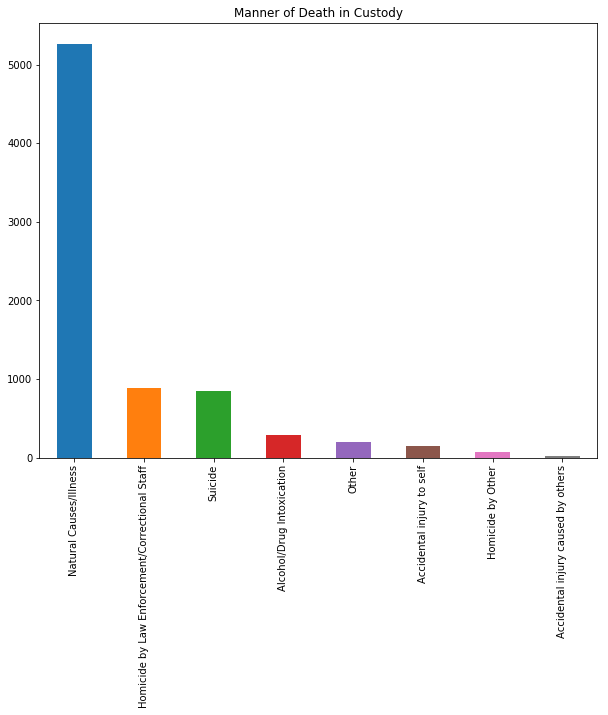

In [19]:
cust['Manner Death'].value_counts().plot(kind ='bar',figsize=(10,8), title = 'Manner of Death in Custody')

In [17]:
counts = cust['Manner Death'].value_counts()

source = ColumnDataSource(data=dict(deathtype=deathtype, counts=counts))

p = figure(y_range=deathtype, plot_height=500, plot_width=900, title="Manner of Death in Custody",
           toolbar_location=None, tools="")

p.hbar(y='deathtype', right='counts', height=0.5, color='color', legend="deathtype", source=source, 
       line_color='white', fill_color=factor_cmap('deathtype', palette=Spectral8, factors=deathtype))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

p.xgrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 6000
p.legend.orientation = "vertical"
p.legend.location = "top_right"

show(p)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other', 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [39]:
counts = cust['Ethnicity'].value_counts()

source = ColumnDataSource(data=dict(eth=eth, counts=counts))

t = figure(y_range=eth, plot_height=500, plot_width=900, title="Ethnicity of Deaths in Custody",
           toolbar_location=None, tools="")

t.hbar(y='eth', right='counts', height=0.5, color='color', legend="eth", source=source, 
       line_color='white', fill_color=factor_cmap('eth', palette=Spectral8, factors=eth))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

t.xgrid.grid_line_color = None
t.x_range.start = 0
t.x_range.end = 6000
t.legend.orientation = "vertical"
t.legend.location = "top_right"

show(t)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other', 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [22]:
#custna = cust[(cust['Custody Type'].dropna()) & (cust['Ethnicity'].dropna()) & (cust['Manner Death'].dropna()) & (cust['Charges Status'].dropna())]
custody= cust['Custody Type'].dropna()
race = cust['Ethnicity'].dropna()
death = cust['Manner Death'].dropna()
charge = cust['Charges Status'].dropna()

dfcharge = pd.get_dummies(custody)
dfrace =pd.get_dummies(race)
dfdeath = pd.get_dummies(death)
dfcharge = pd.get_dummies(charge)

In [23]:
dfcharge.tail()

,Convicted,Filed,Not filed at time of death,Probation/Parole
7724,0,0,1,0
7725,1,0,0,0
7726,0,0,1,0
7727,0,0,1,0
7728,1,0,0,0


In [24]:
dfdeath.corrwith(dfrace)

Accidental injury caused by others               NaN
Accidental injury to self                        NaN
Alcohol/Drug Intoxication                        NaN
American Indian/Alaska Native                    NaN
Anglo or White                                   NaN
Asian                                            NaN
Black or African American                        NaN
Hispanic or Latino                               NaN
Homicide by Law Enforcement/Correctional Staff   NaN
Homicide by Other                                NaN
Middle East                                      NaN
Native Hawaiian/Pacific Islander                 NaN
Natural Causes/Illness                           NaN
Other                                            NaN
Other/Don't Know                                 NaN
Suicide                                          NaN
dtype: float64

In [25]:
'''
For Grouped/Nested bat chart

# this creates tuple pairs of Manner of Death and Ethnicity
x = [ (deathtype, eth) for type in deathtype for race in eth ]

source = ColumnDataSource(data=dict(x=x, counts=counts))

q = figure(x_range=FactorRange(*x), plot_height=250, title="Manner of Death by Ethnicity",
           toolbar_location=None, tools="")

q.vbar(x='x', top='counts', width=0.9, source=source)

q.y_range.start = 0
q.x_range.range_padding = 0.1
q.xaxis.major_label_orientation = 1
q.xgrid.grid_line_color = None

show(q)
'''

'\nFor Grouped/Nested bat chart\n\n# this creates tuple pairs of Manner of Death and Ethnicity\nx = [ (deathtype, eth) for type in deathtype for race in eth ]\n\nsource = ColumnDataSource(data=dict(x=x, counts=counts))\n\nq = figure(x_range=FactorRange(*x), plot_height=250, title="Manner of Death by Ethnicity",\n           toolbar_location=None, tools="")\n\nq.vbar(x=\'x\', top=\'counts\', width=0.9, source=source)\n\nq.y_range.start = 0\nq.x_range.range_padding = 0.1\nq.xaxis.major_label_orientation = 1\nq.xgrid.grid_line_color = None\n\nshow(q)\n'

In [19]:
breakdown = cust.groupby(['Ethnicity', 'Manner Death'])['Last Name'].count()

In [20]:
death_eth_df = breakdown.unstack()

In [21]:
death_eth_df = death_eth_df.fillna(0).astype(int)

In [22]:
death_eth_df

Manner Death,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
Ethnicity,,,,,,,,
American Indian/Alaska Native,0,0,0,5,0,5,1,2
Anglo or White,3,63,99,321,25,2183,77,455
Asian,0,0,3,5,1,19,0,6
Black or African American,6,36,93,213,22,1687,68,147
Hispanic or Latino,11,54,88,291,24,1363,56,229
Middle East,0,1,0,7,0,2,0,2
Native Hawaiian/Pacific Islander,1,0,1,1,0,1,0,1
Other/Don't Know,0,1,0,35,0,6,1,2


In [23]:
ethni = cust.groupby(['Ethnicity'])['Last Name'].count()

In [24]:
print ("% of Whites killed by officer:", breakdown['Anglo or White', 'Homicide by Law Enforcement/Correctional Staff']/ethni['Anglo or White'])

% of Whites killed by officer: 0.0995040297582


In [25]:
print ("% of Latinos killed by officer:", breakdown['Hispanic or Latino', 'Homicide by Law Enforcement/Correctional Staff']/ethni['Hispanic or Latino'])

% of Latinos killed by officer: 0.13752362949


In [37]:
data= {'Ethnicity': eth, 'Accidental injury caused by others' : death_eth_df['Accidental injury caused by others'].values, 
       'Natural Causes/Illness': death_eth_df['Natural Causes/Illness'].values,  'Other':death_eth_df['Other'].values, 
       'Accidental injury to self': death_eth_df['Accidental injury to self'].values,  
       'Homicide by Law Enforcement/Correctional Staff': death_eth_df['Homicide by Law Enforcement/Correctional Staff'].values,
       'Suicide': death_eth_df['Suicide'].values, 'Alcohol/Drug Intoxication': death_eth_df['Alcohol/Drug Intoxication'].values, 
       'Homicide by Other': death_eth_df['Homicide by Other'].values}

source = ColumnDataSource(data=data)

g = figure(y_range= data['Ethnicity'], plot_height=500,plot_width=900, title="Manner of Death by Ethnicity",
           toolbar_location=None, tools="")


g.hbar_stack(deathtype, y= 'Ethnicity', height=0.9, color=Spectral8, source=source,
             legend=[value(x) for x in deathtype])

g.x_range.start = 0
g.x_range.end = 6000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)


In [4]:
major = cust[(cust['Department Name'] == 'Texas Department Of Criminal Justice') | (cust['Department Name'] == 'Harris County Sheriff\'s Dept.')| (cust['Department Name'] == 'Houston Police Dept.')| (cust['Department Name'] == 'San Antonio Police Dept.')| (cust['Department Name'] == 'Fort Worth Police Dept.')| (cust['Department Name'] == 'Dallas Police Dept.')| (cust['Department Name'] == 'Dallas County Sheriff\'s Dept.') | (cust['Department Name'] == 'Bexar County Sheriff\s Dept.')| (cust['Department Name'] == 'Texas Department Of Public Safety')| (cust['Department Name'] == 'Austin Police Dept.')| (cust['Department Name'] == 'Tarrant County Sheriff\s Dept.')| (cust['Department Name'] == 'Travis County Sheriff\'s Dept.')]  
reduce =major.groupby(['Ethnicity', 'Department Name'])['Last Name'].count().sort_values(ascending = False)
majdept = reduce.unstack()
majdept = majdept.fillna(0).astype(int)
majdept

Department Name,Austin Police Dept.,Dallas County Sheriff's Dept.,Dallas Police Dept.,Fort Worth Police Dept.,Harris County Sheriff's Dept.,Houston Police Dept.,San Antonio Police Dept.,Texas Department Of Criminal Justice,Texas Department Of Public Safety,Travis County Sheriff's Dept.
Ethnicity,,,,,,,,,,
American Indian/Alaska Native,0,1,0,0,1,0,0,4,0,0
Anglo or White,21,29,30,29,66,50,27,2154,51,21
Asian,1,1,0,1,3,3,2,17,0,0
Black or African American,11,55,61,16,116,113,25,1546,9,16
Hispanic or Latino,6,12,27,16,42,65,82,1347,20,10
Middle East,0,0,1,0,2,2,1,3,0,0
Native Hawaiian/Pacific Islander,0,0,1,0,0,0,0,0,0,0
Other/Don't Know,0,0,0,0,1,0,1,6,0,0


In [5]:
dept = cust.groupby(['Department Name'])['Last Name'].count()

In [7]:
majdept.columns

Index(['Austin Police Dept.', 'Dallas County Sheriff's Dept.',
       'Dallas Police Dept.', 'Fort Worth Police Dept.',
       'Harris County Sheriff's Dept.', 'Houston Police Dept.',
       'San Antonio Police Dept.', 'Texas Department Of Criminal Justice',
       'Texas Department Of Public Safety', 'Travis County Sheriff's Dept.'],
      dtype='object', name='Department Name')

In [8]:
print ("% of deaths in custody of Houston PD that were Black:", majdept.loc['Black or African American', 'Houston Police Dept.']/dept['Houston Police Dept.'])

% of deaths in custody of Houston PD that were Black: 0.484978540773


In [9]:
print ("% of deaths in custody of Houston PD that were Black:", majdept.loc['Anglo or White', 'Houston Police Dept.']/dept['Houston Police Dept.'])

% of deaths in custody of Houston PD that were Black: 0.214592274678


In [40]:
# define starts/ends for wedges from percentages of a circle

percents = [0, 0.3, 0.4, 0.6, 0.9, 1]
starts = [p*2*pi for p in percents[:-1]]
ends = [p*2*pi for p in percents[1:]]

# a color for each pie piece
colors = ["red", "green", "blue", "orange", "yellow"]

pie = figure(x_range=(-1,1), y_range=(-1,1))

pie.wedge(x=0, y=0, radius=1, start_angle=starts, end_angle=ends, color=colors)

show(pie)

In [ ]:
'''
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral5
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

output_file("bars.html")

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(('cyl', 'mfr'))

source = ColumnDataSource(group)
index_cmap = factor_cmap('cyl_mfr', palette=Spectral5, factors=sorted(df.cyl.unique()), end=1)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)
'''